# Decision Tree

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
max_depth = 7
clf = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 0,
    max_depth = max_depth,
).fit(X_train, y_train)

print("train accuracy = {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy = {:.3%}".format(clf.score(X_test, y_test)))

train accuracy = 100.000%
test accuracy = 95.804%


In [4]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

graph_viz = tree.export_graphviz(clf, out_file = None, feature_names = features, class_names = labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True)

'Source.gv.pdf'

In [5]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

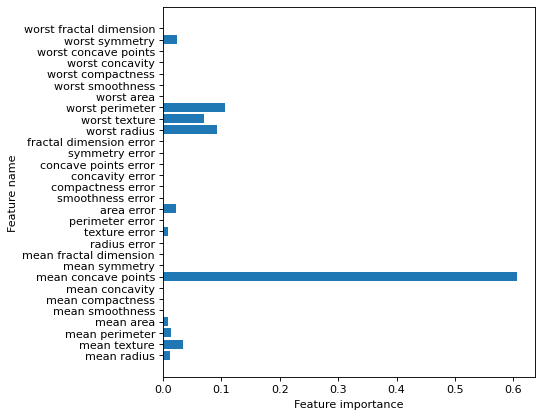

In [6]:
plot_feature_importances(clf, features)

# Random Forests

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list = [5,10,20]
max_features_list = list(np.arange(1, X_train.shape[1]+1))

for i in range (len(n_estimators_list)): 
    for j in range (len(max_features_list)):
        index = len(max_features_list)*i+j           
        clf = RandomForestClassifier(
            random_state = 10,
            n_estimators = n_estimators_list[i],
            max_features = max_features_list[j],        
        ).fit(X_train, y_train)
        accuracy_train = clf.score(X_train, y_train)
        accuracy_test = clf.score(X_test, y_test)
        print ('n_estimators= {}, max_features = {}, accuracy_train = {:.3%}, accuracy_test = {:.3%}'.format(
            n_estimators_list[i], max_features_list[j], accuracy_train, accuracy_test))
        
print("Comparing to decision tree clf")
max_depth = 3
clf = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 0,
    max_depth = max_depth,
).fit(X_train, y_train)

print("train accuracy = {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy = {:.3%}".format(clf.score(X_test, y_test)))

n_estimators= 5, max_features = 1, accuracy_train = 99.296%, accuracy_test = 94.406%
n_estimators= 5, max_features = 2, accuracy_train = 99.531%, accuracy_test = 97.203%
n_estimators= 5, max_features = 3, accuracy_train = 99.061%, accuracy_test = 95.804%
n_estimators= 5, max_features = 4, accuracy_train = 99.531%, accuracy_test = 97.203%
n_estimators= 5, max_features = 5, accuracy_train = 99.296%, accuracy_test = 97.902%
n_estimators= 5, max_features = 6, accuracy_train = 99.061%, accuracy_test = 95.105%
n_estimators= 5, max_features = 7, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 8, accuracy_train = 98.826%, accuracy_test = 96.503%
n_estimators= 5, max_features = 9, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 10, accuracy_train = 99.296%, accuracy_test = 95.105%
n_estimators= 5, max_features = 11, accuracy_train = 99.296%, accuracy_test = 96.503%
n_estimators= 5, max_features = 12, accuracy_train = 99.765%, a

# Gradient boosting decision tree

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
max_depth = 3
clf = GradientBoostingClassifier(
    learning_rate = 0.1,
    max_depth = max_depth,
).fit(X_train, y_train)

print("train accuracy = {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy = {:.3%}".format(clf.score(X_test, y_test)))

train accuracy = 100.000%
test accuracy = 95.804%


# XGBoost

In [11]:
from xgboost import XGBClassifier

In [32]:
clf_xgboost = XGBClassifier(eval_metric = 'logloss', max_depth = 7).fit(X_train, y_train)

print('\nAccuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_xgboost.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_xgboost.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.99


In [31]:
print ('\n','='*20, '\nDecisionTreeClassifier')
clf = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 0,        
    max_depth = max_depth,    
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nRandomForestClassifier')
clf = RandomForestClassifier(
    random_state = 10,
    n_estimators = n_estimators_list[i],
    max_features = max_features_list[j],  
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nGradientBoostingClassifier')
clf = GradientBoostingClassifier(
    learning_rate = 0.1,
    max_depth = 3
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nXGBClassifier')
clf = XGBClassifier(eval_metric= 'logloss', max_depth = 7)
clf.fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))


DecisionTreeClassifier
train accuracy= 97.653%
test accuracy= 95.105%

RandomForestClassifier
train accuracy= 99.531%
test accuracy= 96.503%

GradientBoostingClassifier
train accuracy= 100.000%
test accuracy= 95.804%

XGBClassifier
train accuracy= 100.000%
test accuracy= 98.601%
